In [96]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
plt.style.use('classic')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import StratifiedShuffleSplit,cross_validate

In [97]:
data=pd.read_csv("data_cardiovascular_risk.csv")

In [98]:
data.head(15)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [100]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (data.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

float_ = (data.dtypes == 'float64')
num_cols = list(float_[float_].index)
print("Float variables:",len(num_cols))

Categorical variables: 2
Integer variables: 6
Float variables: 9


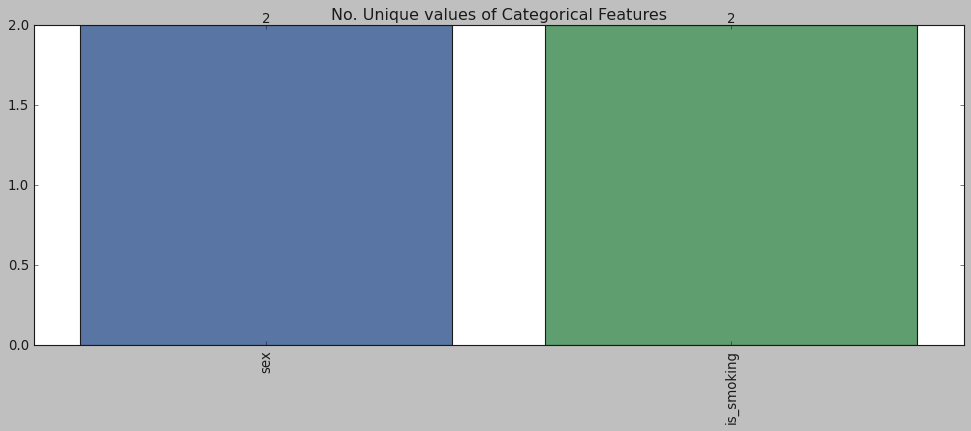

In [101]:
unique_values = []
for col in object_cols:
    unique_values.append(data[col].unique().size)
plt.figure(figsize=(15,5))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
ax=sns.barplot(x=object_cols,y=unique_values)
ax.bar_label(ax.containers[0])
plt.show()

In [102]:
datad=data.isnull().sum()
datad.sort_values(ascending=False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

In [103]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
id                 0.000000
diaBP              0.000000
sysBP              0.000000
prevalentHyp       0.000000
diabetes           0.000000
age                0.000000
prevalentStroke    0.000000
is_smoking         0.000000
sex                0.000000
TenYearCHD         0.000000
dtype: float64

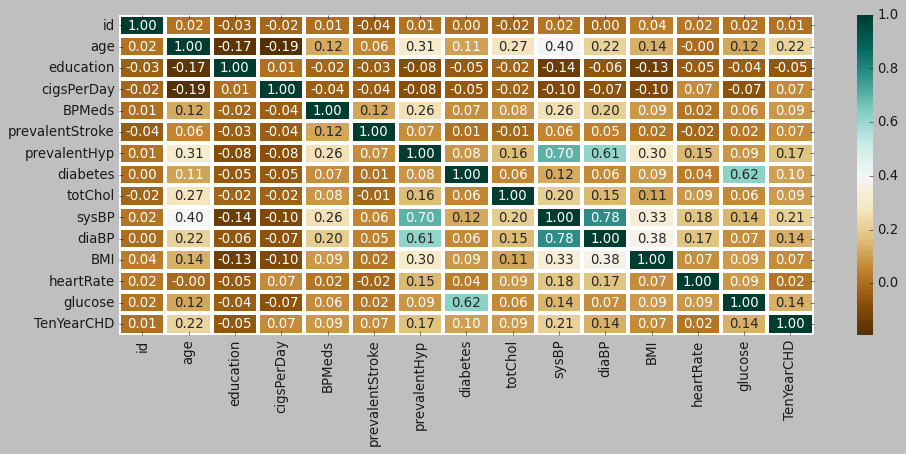

In [104]:
plt.figure(figsize=(14, 5))
sns.heatmap(data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,annot=True)
plt.show()

In [105]:
for i in data.select_dtypes("O").columns:
    print("#######################  \n")
    print(i)
    print("\n")
    print(data[i].value_counts())

#######################  

sex


F    1923
M    1467
Name: sex, dtype: int64
#######################  

is_smoking


NO     1703
YES    1687
Name: is_smoking, dtype: int64


In [106]:
for i in data.select_dtypes("float64").columns:
    print("#######################  \n")
    print(i)
    print("\n")
    print(data[i].value_counts())

#######################  

education


1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
#######################  

cigsPerDay


0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64
#######################  

BPMeds


0.0    3246
1.0     100
Name: BPMeds, dtype: int64
#######################  

totChol


240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
137.0     1
113.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64
#######################  

sysBP


110.0    87
120.0    85
130.0    85
125.0    69
115.0    68
    

In [107]:
for i in data.select_dtypes("int64").columns:
    print("#######################  \n")
    print(i)
    print("\n")
    print(data[i].value_counts())

#######################  

id


0       1
2277    1
2253    1
2254    1
2255    1
       ..
1133    1
1134    1
1135    1
1136    1
3389    1
Name: id, Length: 3390, dtype: int64
#######################  

age


40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64
#######################  

prevalentStroke


0    3368
1      22
Name: prevalentStroke, dtype: int64
#######################  

prevalentHyp


0    2321
1    1069
Name: prevalentHyp, dtype: int64
#######################  

diabetes


0    3303
1      87
Name: diabetes, dtype: int64
#######################  

TenYearCHD


0    2879
1     511
Name: TenYearCHD, dtype: int64


In [108]:
data = data.dropna()

In [109]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

id                 0.0
diabetes           0.0
glucose            0.0
heartRate          0.0
BMI                0.0
diaBP              0.0
sysBP              0.0
totChol            0.0
prevalentHyp       0.0
age                0.0
prevalentStroke    0.0
BPMeds             0.0
cigsPerDay         0.0
is_smoking         0.0
sex                0.0
education          0.0
TenYearCHD         0.0
dtype: float64

<Figure size 1280x480 with 0 Axes>

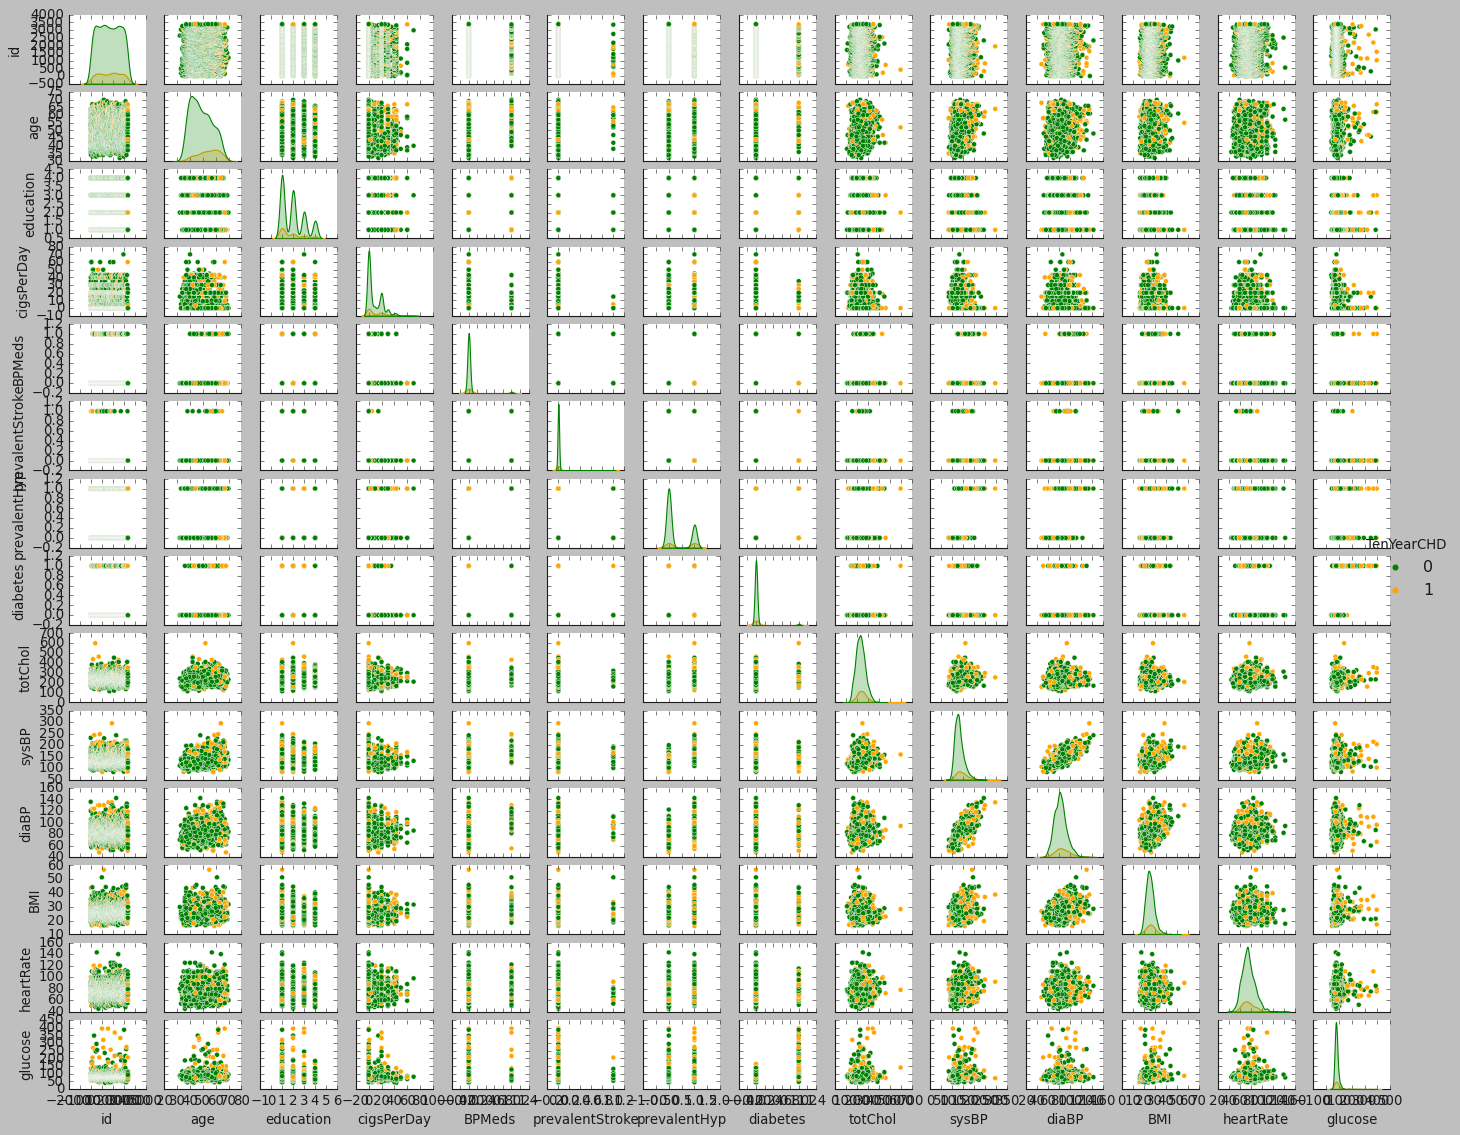

In [110]:
plt.figure(figsize=(16,6))
sns.set_palette(sns.color_palette(["green", "orange"]))
sns.pairplot(data, hue='TenYearCHD')
fig=plt.gcf()
fig.set_size_inches(18,14)
#plt.show()

Text(0, 0.5, 'totChol')

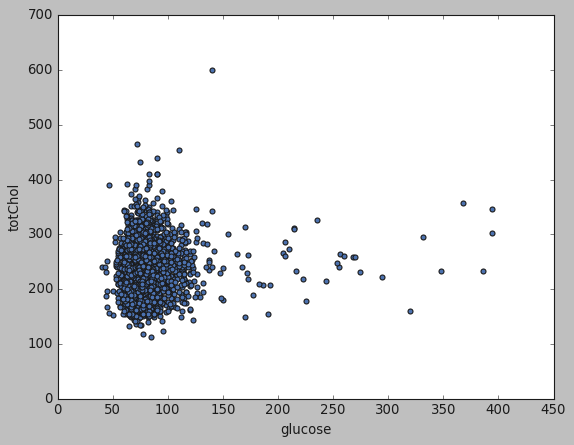

In [111]:
plt.scatter(data['glucose'], data['totChol'])
plt.xlabel('glucose')
plt.ylabel('totChol')

Text(0, 0.5, 'heartRate')

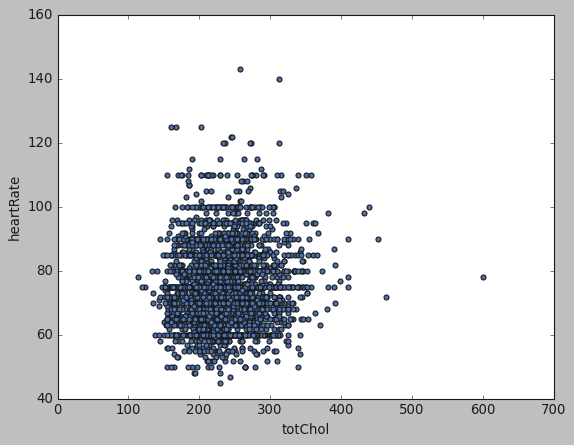

In [112]:
plt.scatter(data['totChol'], data['heartRate'])
plt.xlabel('totChol')
plt.ylabel('heartRate')

Text(0, 0.5, 'totChol')

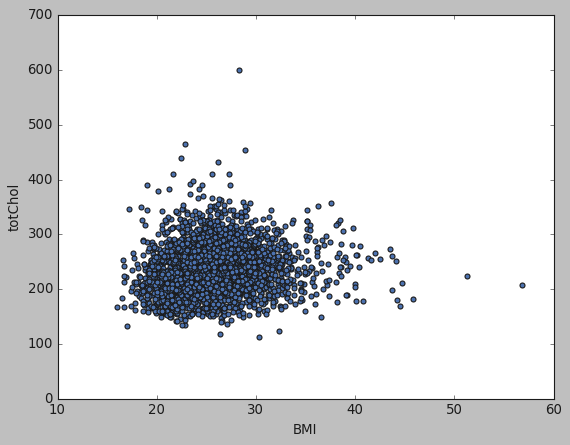

In [113]:
plt.scatter(data['BMI'], data['totChol'])
plt.xlabel('BMI')
plt.ylabel('totChol')

Text(0, 0.5, 'totChol')

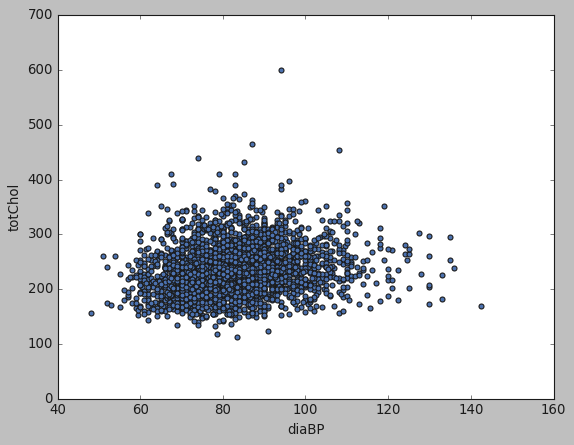

In [114]:
plt.scatter(data['diaBP'], data['totChol'])
plt.xlabel('diaBP')
plt.ylabel('totChol')

Text(0, 0.5, 'totChol')

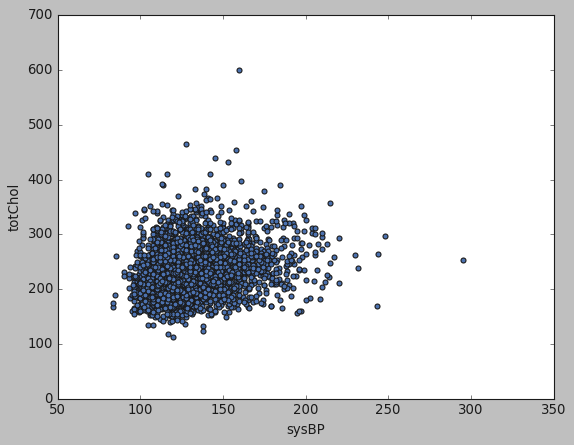

In [115]:
plt.scatter(data['sysBP'], data['totChol'])
plt.xlabel('sysBP')
plt.ylabel('totChol')

Text(0, 0.5, 'totChol')

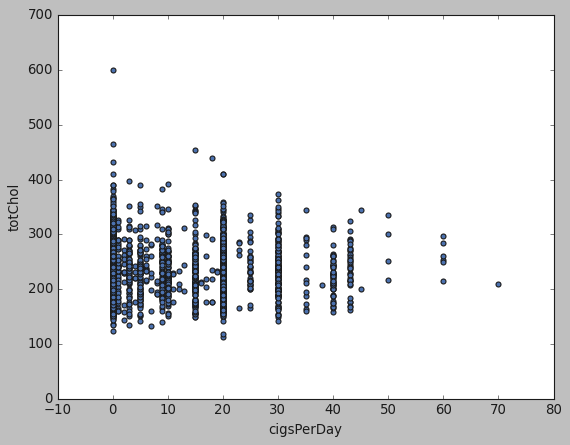

In [116]:
plt.scatter(data['cigsPerDay'], data['totChol'])
plt.xlabel('cigsPerDay')
plt.ylabel('totChol')

Text(0, 0.5, 'totChol')

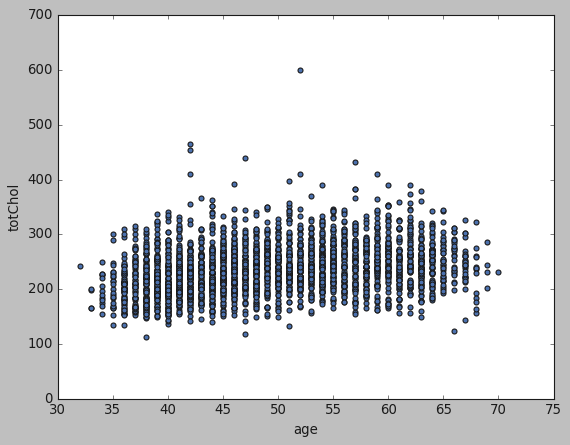

In [117]:
plt.scatter(data['age'], data['totChol'])
plt.xlabel('age')
plt.ylabel('totChol')

Text(0, 0.5, 'sysBP')

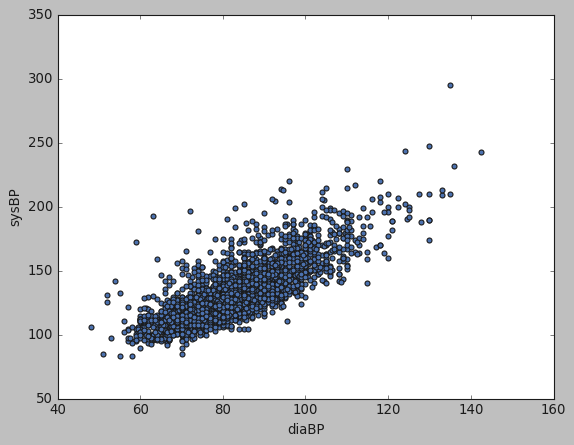

In [118]:
plt.scatter(data['diaBP'], data['sysBP'])
plt.xlabel('diaBP')
plt.ylabel('sysBP')

Text(0, 0.5, 'BMI')

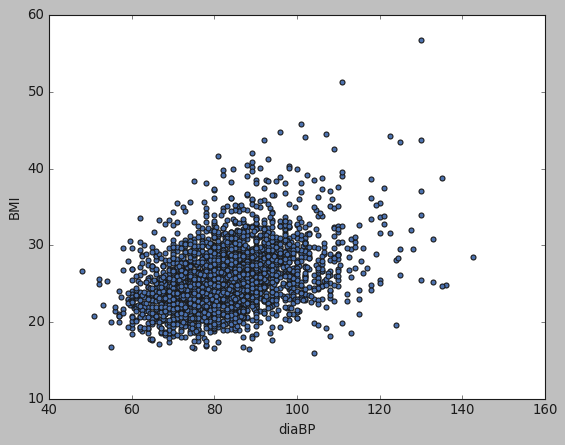

In [119]:
plt.scatter(data['diaBP'], data['BMI'])
plt.xlabel('diaBP')
plt.ylabel('BMI')

Text(0, 0.5, 'BMI')

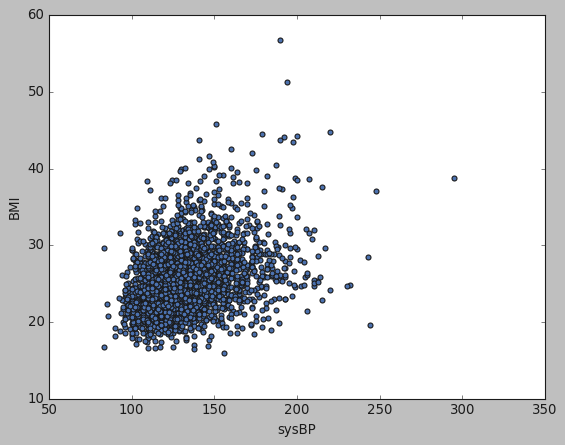

In [120]:
plt.scatter(data['sysBP'], data['BMI'])
plt.xlabel('sysBP')
plt.ylabel('BMI')

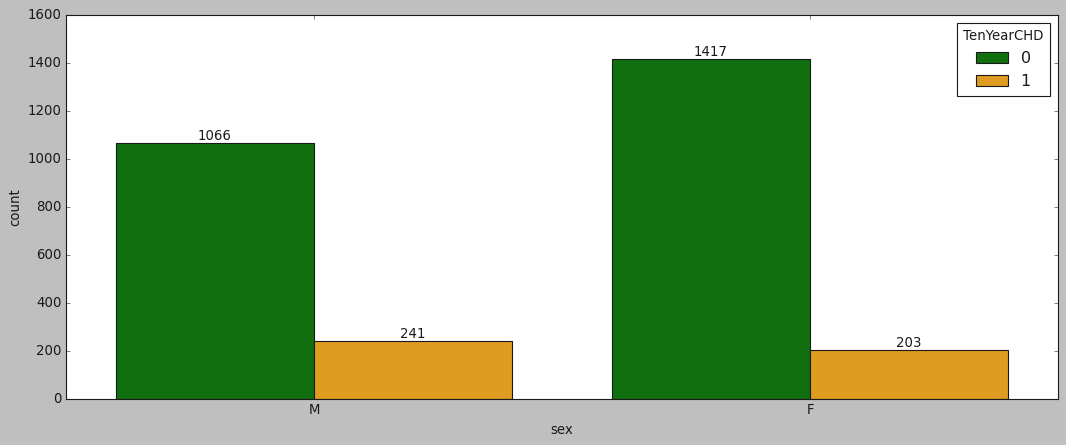

In [121]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="sex",hue="TenYearCHD",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

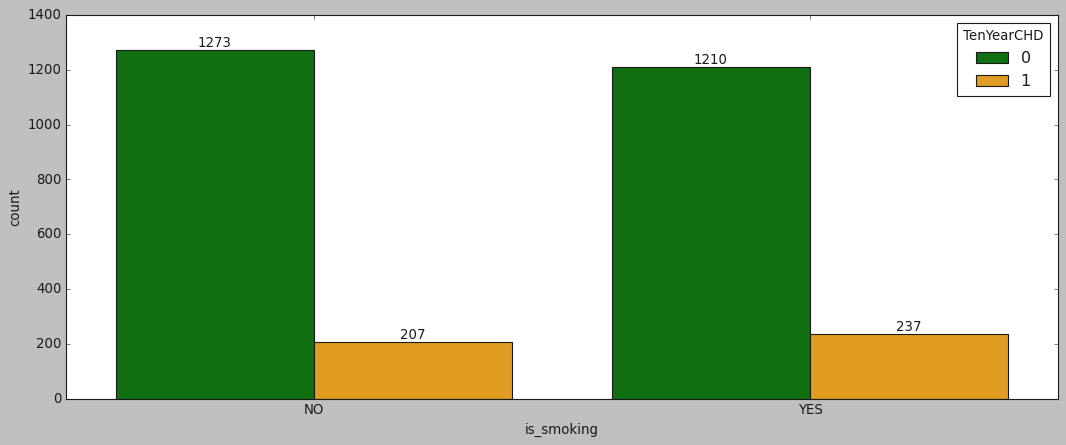

In [122]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="is_smoking",hue="TenYearCHD",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

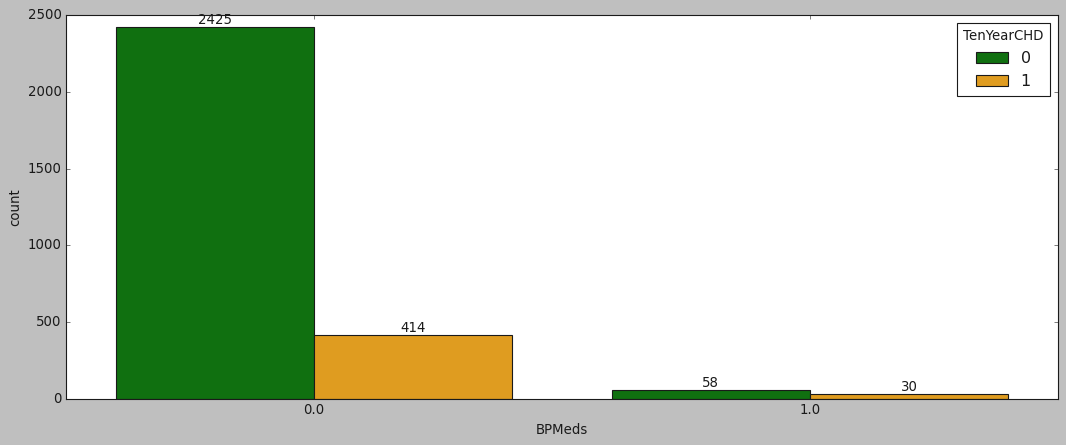

In [123]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="BPMeds",hue="TenYearCHD",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [124]:
data['TenYearCHD'].value_counts()
# Address data imbalance and leakage before modeling to ensure fair representation and accurate predictions.

0    2483
1     444
Name: TenYearCHD, dtype: int64

In [125]:
def univariate_analysis(column_name):
    data_EDA = pd.DataFrame(sorted(list(data[column_name].unique())),columns=[column_name])
    data_EDA['Total_Count'] = list(data.groupby(column_name).TenYearCHD.count())
    data_EDA['HDY'] = list(data[data.TenYearCHD==1].groupby(column_name).TenYearCHD.count())
    data_EDA['HDN'] = list(data[data.TenYearCHD==0].groupby(column_name).TenYearCHD.count())
    data_EDA['% Of HDY'] = round(data_EDA['HDY']/data_EDA['Total_Count']*100,3)
    data_EDA['% Of HDN'] = round(data_EDA['HDN']/data_EDA['Total_Count']*100,3)
    data_EDA = data_EDA.sort_values(by='% Of HDY', ascending=False)
    return data_EDA

In [126]:
univariate_analysis('education')

,education,Total_Count,HDY,HDN,% Of HDY,% Of HDN
0,1.0,1240,231,1009,18.629,81.371
3,4.0,326,44,282,13.497,86.503
2,3.0,487,61,426,12.526,87.474
1,2.0,874,108,766,12.357,87.643


In [127]:
univariate_analysis('sex')

,sex,Total_Count,HDY,HDN,% Of HDY,% Of HDN
1,M,1307,241,1066,18.439,81.561
0,F,1620,203,1417,12.531,87.469


In [128]:
univariate_analysis('is_smoking')

,is_smoking,Total_Count,HDY,HDN,% Of HDY,% Of HDN
1,YES,1447,237,1210,16.379,83.621
0,NO,1480,207,1273,13.986,86.014


In [129]:
univariate_analysis('BPMeds')

,BPMeds,Total_Count,HDY,HDN,% Of HDY,% Of HDN
1,1.0,88,30,58,34.091,65.909
0,0.0,2839,414,2425,14.583,85.417


In [130]:
univariate_analysis('prevalentStroke')

,prevalentStroke,Total_Count,HDY,HDN,% Of HDY,% Of HDN
1,1,18,7,11,38.889,61.111
0,0,2909,437,2472,15.022,84.978


In [131]:
univariate_analysis('prevalentHyp')

,prevalentHyp,Total_Count,HDY,HDN,% Of HDY,% Of HDN
1,1,920,222,698,24.130,75.870
0,0,2007,222,1785,11.061,88.939


In [132]:
univariate_analysis('diabetes')

,diabetes,Total_Count,HDY,HDN,% Of HDY,% Of HDN
1,1,79,29,50,36.709,63.291
0,0,2848,415,2433,14.572,85.428


In [133]:
def bivariate_analysis(col1,col2,c1,c2,no_row):
    a = list(data[col1].unique())
    b = list(data[col2].unique())
    df = pd.DataFrame([(i, j) for i in a for j in b], columns=[col1,col2])
    Total_Count=[]; HDY=[]; HDN=[]
    for i in range(df.shape[0]):
        Total_Count.append((data[(c1==df[col1][i]) & (c2==df[col2][i])]).shape[0])
        HDY.append((data[(c1==df[col1][i]) & (c2==df[col2][i]) & (data.TenYearCHD==1)]).shape[0])
        HDN.append((data[(c1==df[col1][i]) & (c2==df[col2][i]) & (data.TenYearCHD==0)]).shape[0])
    df['Total_Count'] = Total_Count
    df['HDY'] = HDY
    df['HDN'] = HDN
    df['%HDY'] = round(df['HDY']/df['Total_Count']*100,3)
    df['%HDN'] = round(df['HDN']/df['Total_Count']*100,3)
    df = df.dropna()
    df = df.sort_values(by='%HDY', ascending=False)
    d = pd.concat([df.head(no_row), df.tail(no_row)], axis=0)
    return d

In [134]:
bivariate_analysis('prevalentHyp', 'diabetes', data.prevalentHyp, data.diabetes,4)

,prevalentHyp,diabetes,Total_Count,HDY,HDN,%HDY,%HDN
1,1,1,43,20,23,46.512,53.488
3,0,1,36,9,27,25.000,75.000
0,1,0,877,202,675,23.033,76.967
2,0,0,1971,213,1758,10.807,89.193
1,1,1,43,20,23,46.512,53.488
3,0,1,36,9,27,25.000,75.000
0,1,0,877,202,675,23.033,76.967
2,0,0,1971,213,1758,10.807,89.193


In [135]:
bivariate_analysis('age', 'education', data.age, data.education,4)

,age,education,Total_Count,HDY,HDN,%HDY,%HDN
131,65,2.0,5,4,1,80.0,20.0
52,63,4.0,8,5,3,62.5,37.5
100,60,4.0,8,5,3,62.5,37.5
139,66,2.0,5,3,2,60.0,40.0
85,39,1.0,36,0,36,0.0,100.0
88,59,4.0,6,0,6,0.0,100.0
110,48,3.0,20,0,20,0.0,100.0
155,32,2.0,1,0,1,0.0,100.0


In [136]:
bivariate_analysis('age', 'sex', data.age, data.sex,4)

,age,sex,Total_Count,HDY,HDN,%HDY,%HDN
62,67,M,8,5,3,62.5,37.5
70,68,M,10,6,4,60.0,40.0
69,66,F,16,8,8,50.0,50.0
72,69,M,2,1,1,50.0,50.0
40,34,M,4,0,4,0.0,100.0
73,69,F,2,0,2,0.0,100.0
75,70,F,1,0,1,0.0,100.0
77,32,F,1,0,1,0.0,100.0


In [137]:
bivariate_analysis('age', 'is_smoking', data.age, data.is_smoking,4)

,age,is_smoking,Total_Count,HDY,HDN,%HDY,%HDN
71,68,YES,5,3,2,60.000,40.000
70,68,NO,8,4,4,50.000,50.000
73,69,YES,2,1,1,50.000,50.000
68,66,NO,21,10,11,47.619,52.381
40,34,NO,6,0,6,0.000,100.000
32,41,NO,54,0,54,0.000,100.000
28,35,NO,7,0,7,0.000,100.000
77,32,YES,1,0,1,0.000,100.000


In [138]:
bivariate_analysis('age', 'cigsPerDay', data.age, data.cigsPerDay,4)

,age,cigsPerDay,Total_Count,HDY,HDN,%HDY,%HDN
315,56,40.0,1,1,0,100.0,0.0
476,54,25.0,1,1,0,100.0,0.0
1013,65,6.0,1,1,0,100.0,0.0
545,55,1.0,1,1,0,100.0,0.0
404,63,10.0,2,0,2,0.0,100.0
400,38,12.0,1,0,1,0.0,100.0
398,38,23.0,1,0,1,0.0,100.0
1184,32,15.0,1,0,1,0.0,100.0


In [139]:
bivariate_analysis('age', 'BPMeds', data.age, data.BPMeds,4)

,age,BPMeds,Total_Count,HDY,HDN,%HDY,%HDN
59,52,1.0,1,1,0,100.000,0.000
11,53,1.0,4,3,1,75.000,25.000
9,61,1.0,3,2,1,66.667,33.333
65,65,1.0,5,3,2,60.000,40.000
39,47,1.0,1,0,1,0.000,100.000
40,34,0.0,13,0,13,0.000,100.000
47,45,1.0,3,0,3,0.000,100.000
76,32,0.0,1,0,1,0.000,100.000


In [140]:
bivariate_analysis('age', 'prevalentStroke', data.age, data.prevalentStroke,4)

,age,prevalentStroke,Total_Count,HDY,HDN,%HDY,%HDN
27,63,1,1,1,0,100.000,0.000
65,65,1,1,1,0,100.000,0.000
21,56,1,1,1,0,100.000,0.000
59,52,1,3,2,1,66.667,33.333
11,53,1,1,0,1,0.000,100.000
9,61,1,1,0,1,0.000,100.000
74,70,0,1,0,1,0.000,100.000
76,32,0,1,0,1,0.000,100.000


In [141]:
bivariate_analysis('age', 'prevalentHyp', data.age, data.prevalentHyp,4)

,age,prevalentHyp,Total_Count,HDY,HDN,%HDY,%HDN
70,68,1,6,5,1,83.333,16.667
69,66,0,7,4,3,57.143,42.857
64,65,1,18,9,9,50.000,50.000
63,67,0,8,4,4,50.000,50.000
56,37,1,5,0,5,0.000,100.000
41,34,0,13,0,13,0.000,100.000
28,35,1,1,0,1,0.000,100.000
77,32,0,1,0,1,0.000,100.000


In [142]:
bivariate_analysis('age', 'diabetes', data.age, data.diabetes,4)

,age,diabetes,Total_Count,HDY,HDN,%HDY,%HDN
21,56,1,2,2,0,100.0,0.0
55,48,1,1,1,0,100.0,0.0
63,67,1,1,1,0,100.0,0.0
71,68,1,2,2,0,100.0,0.0
5,50,1,3,0,3,0.0,100.0
3,46,1,1,0,1,0.0,100.0
74,70,0,1,0,1,0.0,100.0
76,32,0,1,0,1,0.0,100.0


In [143]:
bivariate_analysis('age', 'totChol', data.age, data.totChol,4)

,age,totChol,Total_Count,HDY,HDN,%HDY,%HDN
1285,53,310.0,1,1,0,100.0,0.0
1796,44,158.0,1,1,0,100.0,0.0
2891,38,253.0,1,1,0,100.0,0.0
1705,44,221.0,1,1,0,100.0,0.0
2702,42,187.0,1,0,1,0.0,100.0
2698,42,160.0,1,0,1,0.0,100.0
2697,42,192.0,1,0,1,0.0,100.0
8973,32,242.0,1,0,1,0.0,100.0


In [144]:
bivariate_analysis('age', 'totChol', data.age, data.totChol,4)

,age,totChol,Total_Count,HDY,HDN,%HDY,%HDN
1285,53,310.0,1,1,0,100.0,0.0
1796,44,158.0,1,1,0,100.0,0.0
2891,38,253.0,1,1,0,100.0,0.0
1705,44,221.0,1,1,0,100.0,0.0
2702,42,187.0,1,0,1,0.0,100.0
2698,42,160.0,1,0,1,0.0,100.0
2697,42,192.0,1,0,1,0.0,100.0
8973,32,242.0,1,0,1,0.0,100.0


In [145]:
bivariate_analysis('age', 'sysBP', data.age, data.sysBP,4)

,age,sysBP,Total_Count,HDY,HDN,%HDY,%HDN
1259,53,184.0,1,1,0,100.0,0.0
540,50,180.0,1,1,0,100.0,0.0
6133,48,139.0,1,1,0,100.0,0.0
6138,48,140.5,1,1,0,100.0,0.0
2537,42,125.5,1,0,1,0.0,100.0
2534,42,145.0,2,0,2,0.0,100.0
2532,42,120.5,1,0,1,0.0,100.0
8472,32,111.0,1,0,1,0.0,100.0


In [146]:
bivariate_analysis('age', 'diaBP', data.age, data.diaBP,4)

,age,diaBP,Total_Count,HDY,HDN,%HDY,%HDN
1380,56,98.0,1,1,0,100.0,0.0
1145,58,82.5,1,1,0,100.0,0.0
1461,56,91.5,1,1,0,100.0,0.0
4190,57,79.0,1,1,0,100.0,0.0
1591,42,66.0,1,0,1,0.0,100.0
1590,42,108.0,1,0,1,0.0,100.0
1585,42,84.5,1,0,1,0.0,100.0
5262,32,70.0,1,0,1,0.0,100.0


In [147]:
bivariate_analysis('glucose', 'totChol', data.glucose, data.totChol,4)

,glucose,totChol,Total_Count,HDY,HDN,%HDY,%HDN
29355,274.0,231.0,1,1,0,100.0,0.0
1893,67.0,202.0,1,1,0,100.0,0.0
10240,84.0,208.0,1,1,0,100.0,0.0
2172,85.0,312.0,2,2,0,100.0,0.0
3384,60.0,217.0,1,0,1,0.0,100.0
3372,60.0,197.0,2,0,2,0.0,100.0
3366,60.0,230.0,1,0,1,0.0,100.0
4892,72.0,220.0,1,0,1,0.0,100.0


In [148]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [149]:
# Find the distribution of the data

def distplots(col):
    sns.distplot(data[col])
    plt.show()
    

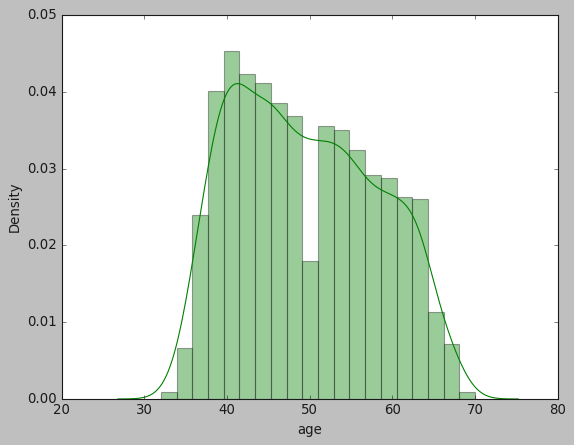

In [150]:
distplots('age')

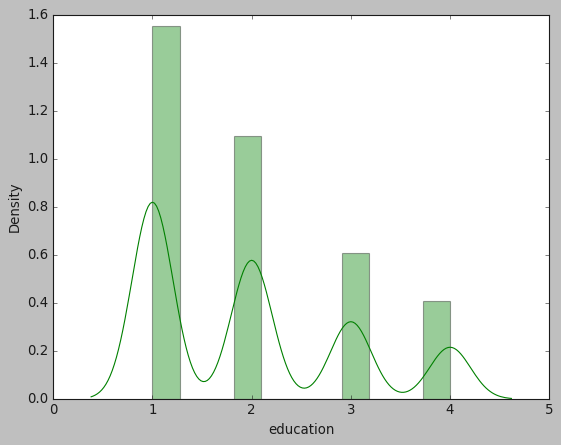

In [151]:
distplots('education')

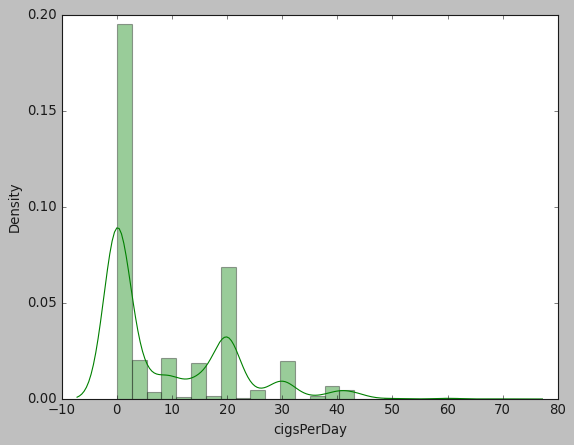

In [152]:
distplots('cigsPerDay')

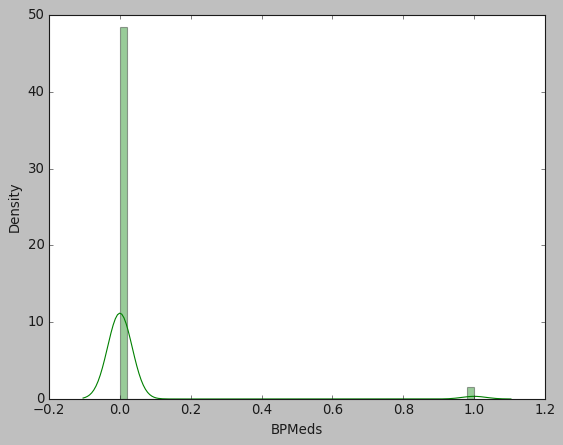

In [153]:
distplots('BPMeds')

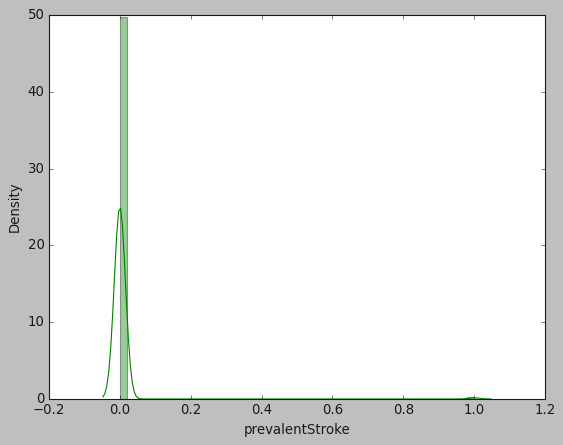

In [154]:
distplots('prevalentStroke')

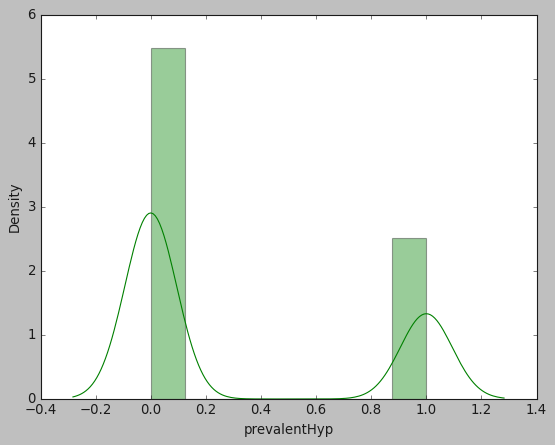

In [155]:
distplots('prevalentHyp')

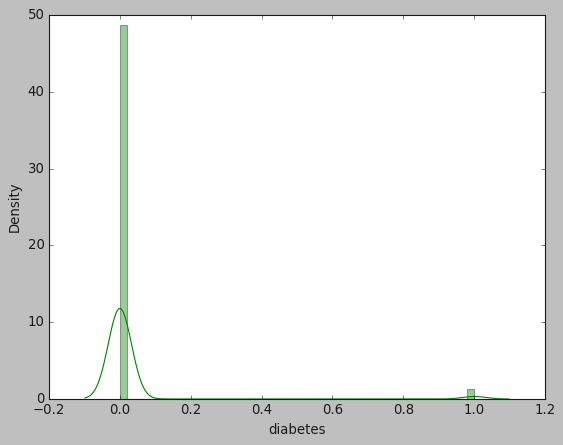

In [156]:
distplots('diabetes')

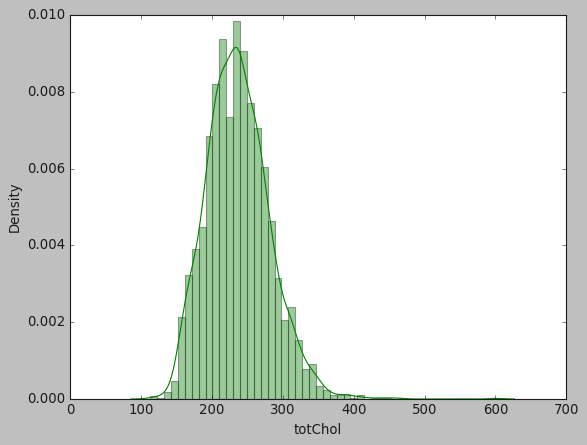

In [157]:
distplots('totChol')

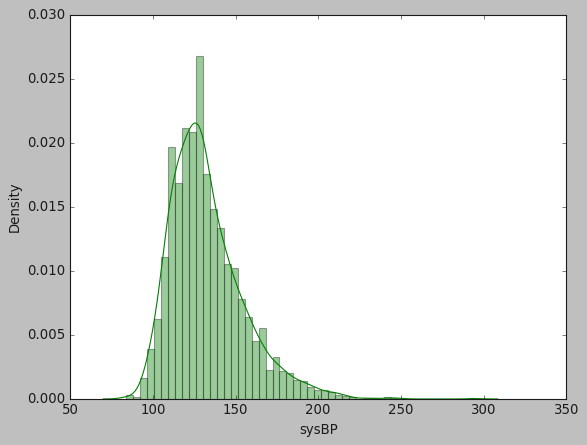

In [158]:
distplots('sysBP')

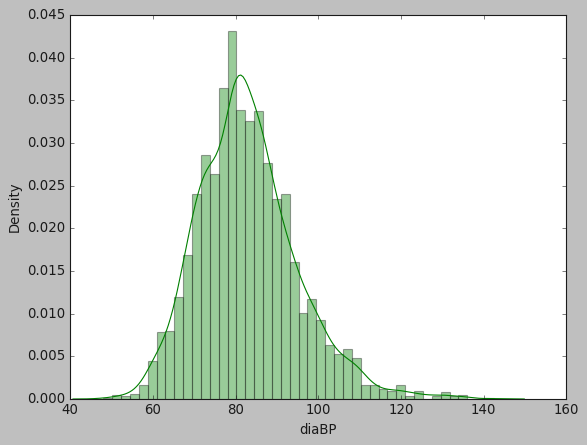

In [159]:
distplots('diaBP')

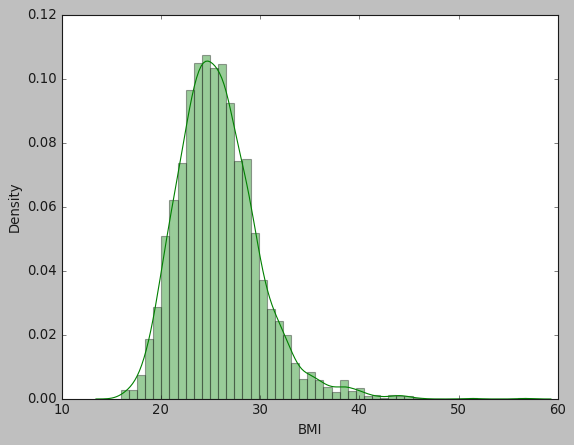

In [160]:
distplots('BMI')

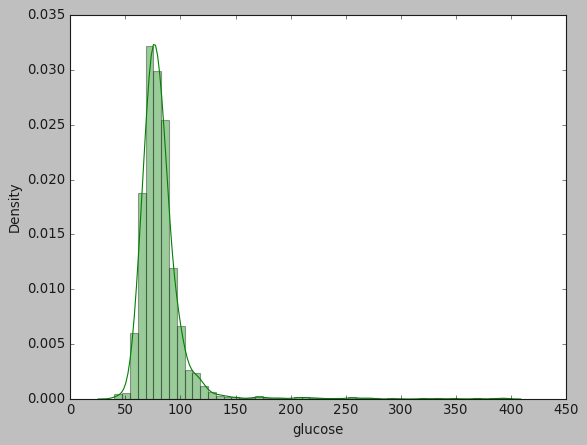

In [161]:
distplots('glucose')

In [162]:
def boxplots(col):
    sns.boxplot(data[col])
    plt.show()

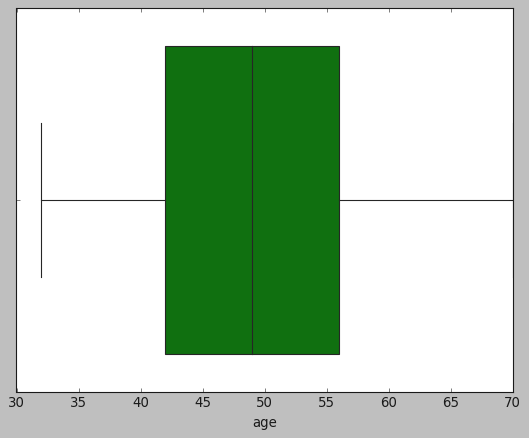

In [163]:
boxplots('age')

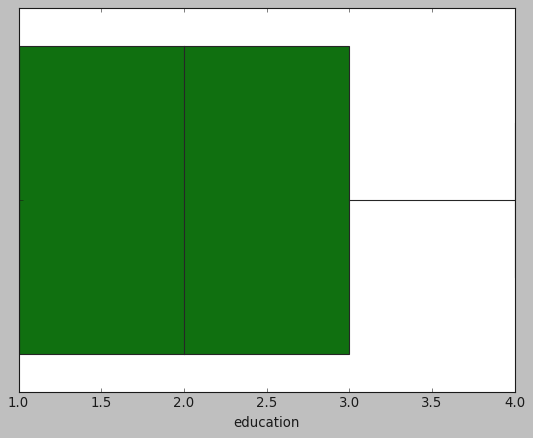

In [164]:
boxplots('education')

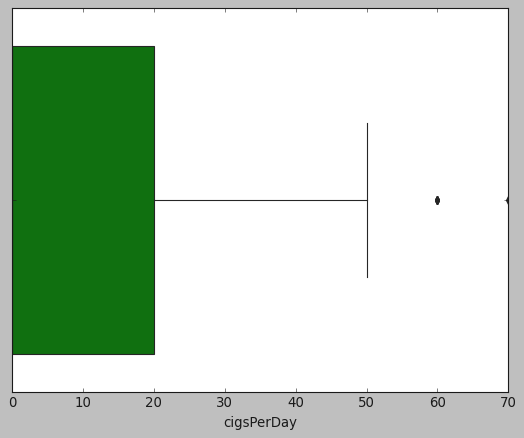

In [165]:
boxplots('cigsPerDay')

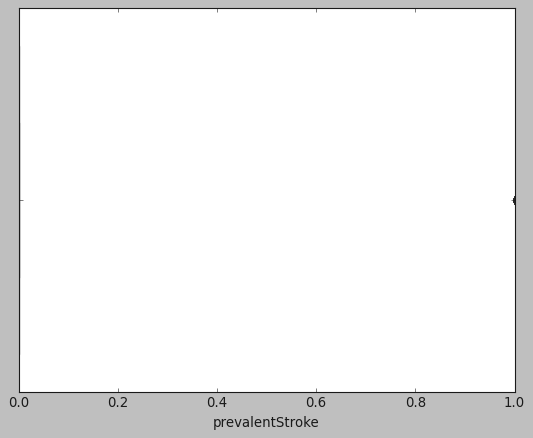

In [166]:
boxplots('prevalentStroke')

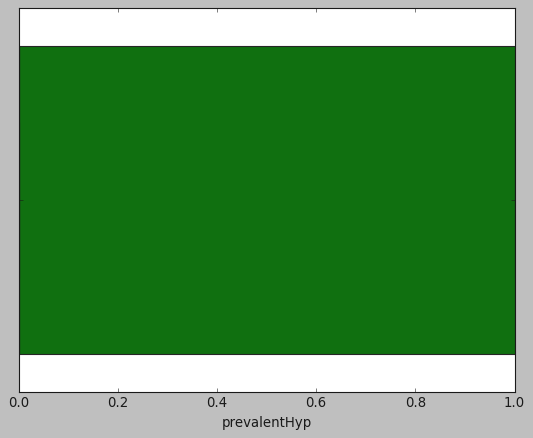

In [167]:
boxplots('prevalentHyp')

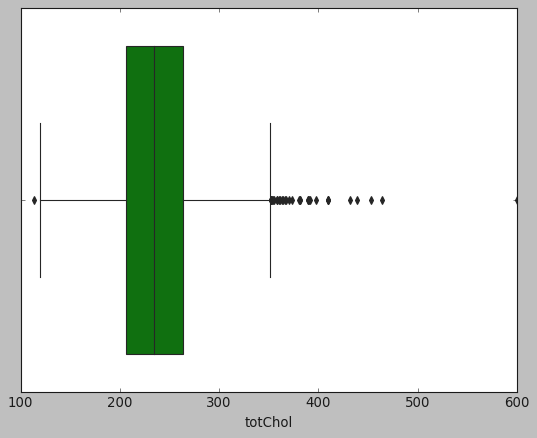

In [168]:
boxplots('totChol')

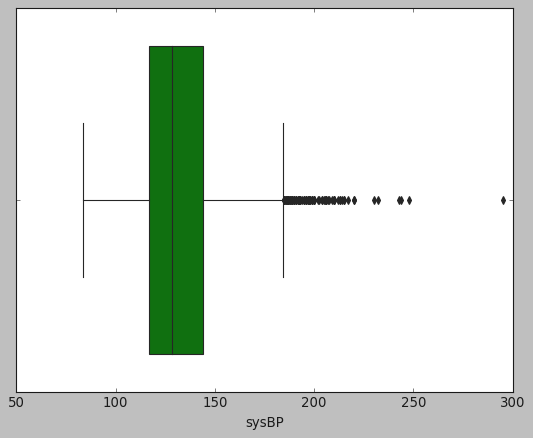

In [169]:
boxplots('sysBP')

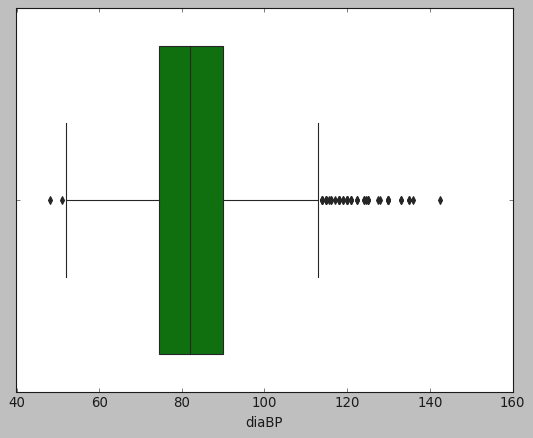

In [170]:
boxplots('diaBP')

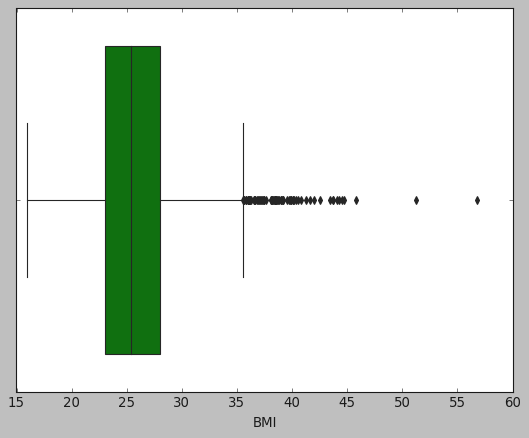

In [171]:
boxplots('BMI')

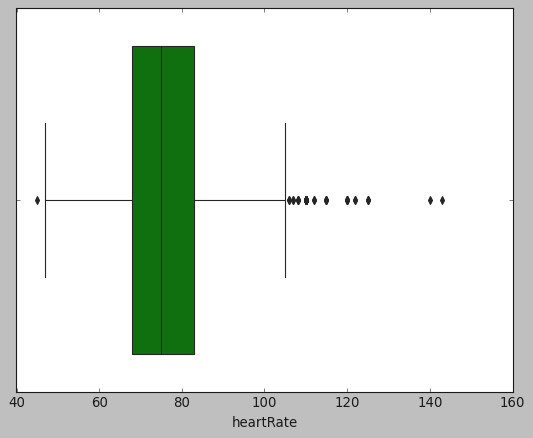

In [172]:
boxplots('heartRate')

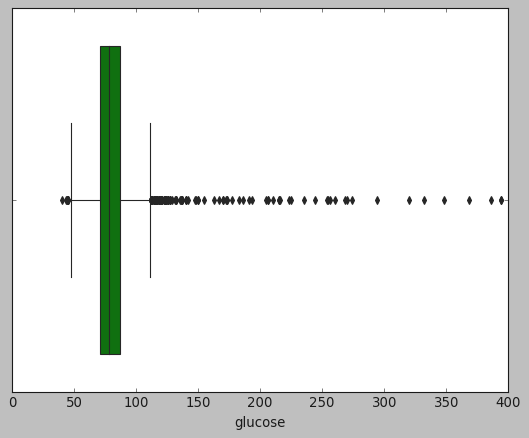

In [173]:
boxplots('glucose')

In [174]:
data.duplicated().sum()

0

In [175]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['is_smoking'] = le.fit_transform(data['is_smoking'])

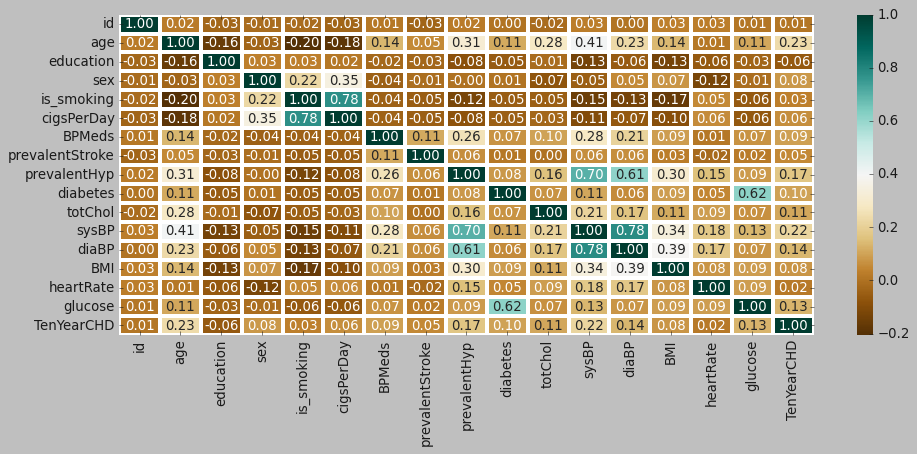

In [176]:
plt.figure(figsize=(14, 5))
sns.heatmap(data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,annot=True)
plt.show()

In [177]:
# split the data into ind and dv 
x = data.drop(['id', 'TenYearCHD'], axis=1)
y = data[['TenYearCHD']]

In [178]:
y.value_counts()

TenYearCHD
0             2483
1              444
dtype: int64

In [179]:
# Imbalance treatement required - Oversampling / SMOTE
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)

In [180]:
pd.DataFrame(y_ros).value_counts()

TenYearCHD
0             2483
1             2483
dtype: int64

In [181]:
# Feature scaling 
sc = MinMaxScaler((-1,1))
x = sc.fit_transform(x_ros)
y = y_ros

In [182]:
pd.DataFrame(x).shape

(4966, 15)

In [183]:
# Pricipal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print(pd.DataFrame(x).shape)
print(x_pca.shape)

(4966, 15)
(4966, 9)


In [184]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=101)

In [185]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=35,max_depth=60,max_leaf_nodes=110)
dt=dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
y_pred_train=dtc.predict(x_train)
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(dt, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(dt, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
dt_train=dt.score(x_train, y_train)
print("Training score: ",dt_train)
dt_test = dt.score(x_test, y_test)
print("Testing score: ",dt_test)
print("***************************************************Report Recall, F1Score, Precision**********************************")
y_pred_train_dtc = dtc.predict(x_train)
y_pred_test_dtc = dtc.predict(x_test)

print(classification_report(y_train, y_pred_train_dtc))
print("**********"*10)
print(classification_report(y_test, y_pred_test_dtc))

***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.20034769808639158
Cross Validation Testing Score -0.15481632653061222
***************************************************Report Training And Testing Score**********************************
Training score:  0.8615307150050352
Testing score:  0.7987927565392354
***************************************************Report Recall, F1Score, Precision**********************************
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      1987
           1       0.80      0.96      0.87      1985

    accuracy                           0.86      3972
   macro avg       0.88      0.86      0.86      3972
weighted avg       0.88      0.86      0.86      3972

****************************************************************************************************
              precision    recall  f1-sc

In [186]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rf=rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_pred_train=rfc.predict(x_train)
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(dt, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(dt, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
rf_train=rf.score(x_train, y_train)
print("Training score: ",rf_train)
rf_test = rf.score(x_test, y_test)
print("Testing score: ",rf_test)
print("***************************************************Report Recall, F1Score, Precision**********************************")
y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train_rfc))
print("**********"*10)
print(classification_report(y_test, y_pred_test_rfc))

***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.20034769808639158
Cross Validation Testing Score -0.15481632653061222
***************************************************Report Training And Testing Score**********************************
Training score:  1.0
Testing score:  0.9436619718309859
***************************************************Report Recall, F1Score, Precision**********************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1987
           1       1.00      1.00      1.00      1985

    accuracy                           1.00      3972
   macro avg       1.00      1.00      1.00      3972
weighted avg       1.00      1.00      1.00      3972

****************************************************************************************************
              precision    recall  f1-score   support



In [187]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred=xgb.predict(x_test)
y_pred_train=xgb.predict(x_train)
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(xgb, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(xgb, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
xgb_train=xgb.score(x_train, y_train)
print("Training score: ",xgb_train)
xgb_test = xgb.score(x_test, y_test)
print("Testing score: ",xgb_test)
print("***************************************************Report Recall, F1Score, Precision**********************************")
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)
print(classification_report(y_train, y_pred_train_xgb))
print("********"*10)
print(classification_report(y_test, y_pred_test_xgb))

***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.7039211207552917
Cross Validation Testing Score -0.02204081632653059
***************************************************Report Training And Testing Score**********************************
Training score:  0.998992950654582
Testing score:  0.937625754527163
***************************************************Report Recall, F1Score, Precision**********************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1987
           1       1.00      1.00      1.00      1985

    accuracy                           1.00      3972
   macro avg       1.00      1.00      1.00      3972
weighted avg       1.00      1.00      1.00      3972

********************************************************************************
              precision    recall  f1-score   support

        

In [188]:
rf=RandomForestClassifier()
bag=BaggingClassifier()
gdb=GradientBoostingClassifier()
adb=AdaBoostClassifier()
dt=DecisionTreeClassifier()
log=LogisticRegression(class_weight="balanced",multi_class='ovr')

In [189]:
for model in[rf,bag,gdb,adb,dt,log]:
    print("##########"*12)
    print("                       performance of ", model)
    print("##########"*12)
    cv=StratifiedShuffleSplit(n_splits=5,test_size=0.25,random_state=111)
    scoring=["f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,x,y,scoring=scoring,cv=cv)
    f1_test_cv=cross_val_scores["test_f1_macro"]
    precision_test_cv=cross_val_scores["test_precision_macro"].mean()
    recall_test_cv=cross_val_scores["test_recall_macro"].mean()
    
    print(f"f1 test score:{f1_test_cv.mean():.4f}")
    print(f"precision test score:{precision_test_cv:.4f}")
    print(f"recall test score:{recall_test_cv:.4f}")

########################################################################################################################
                       performance of  RandomForestClassifier()
########################################################################################################################
f1 test score:0.9654
precision test score:0.9662
recall test score:0.9654
########################################################################################################################
                       performance of  BaggingClassifier()
########################################################################################################################
f1 test score:0.9503
precision test score:0.9525
recall test score:0.9504
########################################################################################################################
                       performance of  GradientBoostingClassifier()
########################################################

In [190]:
for model in[rf,bag,gdb,adb,dt,log]:
    print("##########"*12)
    print("                       Performance of ", model)
    print("##########"*12)
    
    abc=model.fit(x_train,y_train)
    y_pred=abc.predict(x_test)
    AC=accuracy_score(y_test,y_pred)
    #CR=classification_report(y_test,y_pred)
    CM=confusion_matrix(y_test,y_pred)
    #print("classification report \n",CR)
    print(f"Accuracy_score :{AC*100:.2f} %")
    print("\nconfusion_matrix: \n",CM)

########################################################################################################################
                       Performance of  RandomForestClassifier()
########################################################################################################################
Accuracy_score :94.06 %

confusion_matrix: 
 [[438  58]
 [  1 497]]
########################################################################################################################
                       Performance of  BaggingClassifier()
########################################################################################################################
Accuracy_score :94.77 %

confusion_matrix: 
 [[445  51]
 [  1 497]]
########################################################################################################################
                       Performance of  GradientBoostingClassifier()
####################################################################